# Final Project

## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

## Your assignment

Apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10). Apply:

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression
* And, as a bonus challenge, a neural network using Keras.

The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Remember some techniques such as SVM also require the input data to be normalized first.

Many techniques also have "hyperparameters" that need to be tuned. Once you identify a promising approach, see if you can make it even better by tuning its hyperparameters.

I was able to achieve over 80% accuracy - can you beat that?

Below I've set up an outline of a notebook for this project, with some guidance and hints. If you're up for a real challenge, try doing this project from scratch in a new, clean notebook!


## Preparing the data

Importing the mammographic_masses.data.txt file into a Pandas dataframe.

In [276]:
import pandas as pd
import numpy as np
import sklearn as sc

In [277]:

mamogr_data=pd.read_csv('mammographic_masses.data.txt',header=None,na_values=['?'])
mamogr_data


,0,1,2,3,4,5
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


In [278]:
mamogr_data2=mamogr_data.dropna()
mamogr_data2.describe()


,0,1,2,3,4,5
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [279]:
c=0
for i in mamogr_data2[5]:
    if i==1:
        c=c+1
print("1==",c," 0==",830-c)        

1== 403  0== 427


In [280]:
mamo_feat=mamogr_data2.iloc[:, 1:5].values

mamo_lab=np.array(mamogr_data2[5])

In [281]:
mamo_lab

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,

Some of our models require the input data to be normalized, so go ahead and normalize the attribute data. Hint: use preprocessing.StandardScaler().

In [282]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
mamo_feat_scaled = scaler.fit_transform(mamo_feat)


## Decision Trees



In [283]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(mamo_feat_scaled,mamo_lab,test_size=0.25,random_state=42)

In [284]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a decision tree classifier
clfdt = DecisionTreeClassifier()

# Train the classifier on the training data
clfdt.fit(xtrain, ytrain)
# Predict the labels for the testing data
y_pred = clfdt.predict(xtest)

# Calculate the accuracy
accuracydt = accuracy_score(ytest, y_pred)
accuracydt

0.7740384615384616

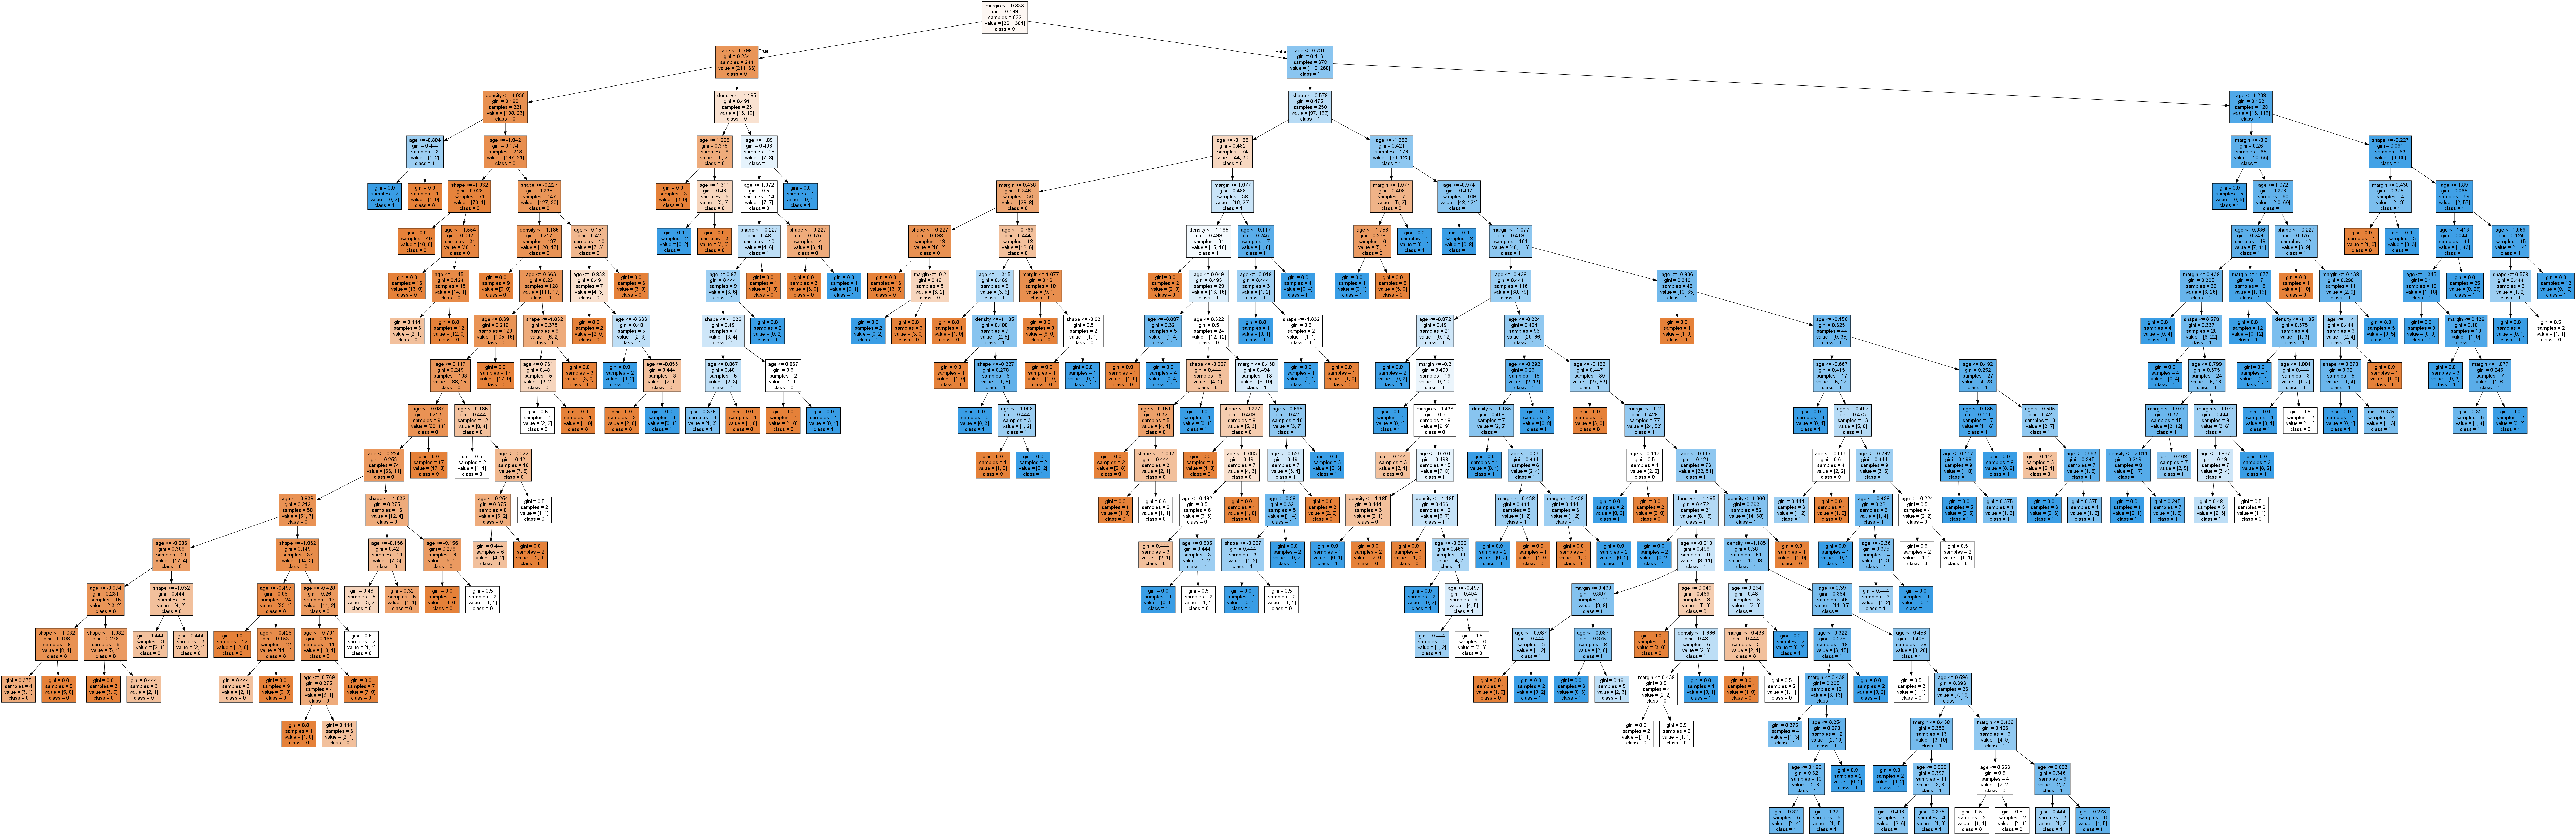

In [285]:
import os
from sklearn.tree import export_graphviz
from IPython.display import Image
import io
from sklearn import tree
from pydotplus import graph_from_dot_data
import graphviz

# Set the PATH environment variable to include the Graphviz bin directory
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# Generate the Graphviz representation of the decision tree
feature_names = ['age', 'shape', 'margin', 'density']
class_names = ['0', '1']
dot_data = export_graphviz(clfdt, out_file=None, feature_names=feature_names, class_names=class_names, filled=True)

# Create a Digraph object from graphviz
graph = graphviz.Source(dot_data)

# Render the decision tree as a PNG image
image = Image(graph.render(format='png'))
display(image)


In [286]:
# Predict the labels for the testing data
y_pred = clfdt.predict(xtest)

# Calculate the accuracy
accuracy = accuracy_score(ytest, y_pred)
accuracy

0.7740384615384616

In [287]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# Define the number of folds (K)
k = 10

# Perform K-fold cross-validation
scores = cross_val_score(clfdt, mamo_feat_scaled,mamo_lab, cv=10)       
# Print the average accuracy across all folds
print("Average Accuracy: ", scores.mean())


Average Accuracy:  0.7409638554216867


In [288]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier with 10 estimators
clfrf = RandomForestClassifier(n_estimators=10, random_state=1)

# Fit the classifier on the training data
clfrf.fit(xtrain, ytrain)
# Make predictions on the test set
y_pred = clfrf.predict(xtest)

# Calculate the accuracy of the predictions
accuracyrf = accuracy_score(ytest, y_pred)
print('accuracy',accuracyrf)

# Perform K-fold cross-validation
scores = cross_val_score(clfrf, mamo_feat_scaled, mamo_lab, cv=10)

# Calculate the average accuracy across all folds
average_accuracy = scores.mean()
print("k fold",average_accuracy)


accuracy 0.75
k fold 0.7421686746987952


## SVM



In [289]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the SVM classifier
clfsvm = SVC(kernel='linear')

# Fit the classifier to the training data
clfsvm.fit(xtrain, ytrain)

# Predict the labels for the test data
y_pred = clfsvm.predict(xtest)

# Calculate the accuracy of the predictions
accuracysvm = accuracy_score(ytest, y_pred)
cv_scores = cross_val_score(clfsvm, mamo_feat_scaled,mamo_lab, cv=10)
cv_scores.mean()
accuracysvm,cv_scores.mean()

(0.8413461538461539, 0.7975903614457832)

In [290]:
print("SVM accuracy",accuracy)

SVM accuracy 0.7740384615384616


## KNN


In [291]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k=1
maxac=0
for i in range(1,60):

    # Create an instance of the KNN classifier
    clfknn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    clfknn.fit(xtrain, ytrain)

    # Predict the labels for the test data
    y_pred = clfknn.predict(xtest)

    # Calculate the accuracy of the predictions
    accuracy = accuracy_score(ytest, y_pred)
    cv_scores = cross_val_score(clfknn, mamo_feat_scaled,mamo_lab, cv=10)
    cv_scores.mean()
    if cv_scores.mean()>maxac:
        maxac=cv_scores.mean()
        kmax=k
    k=k+1
    
kmax,maxac

(59, 0.8012048192771084)

In [292]:
clfknn = KNeighborsClassifier(n_neighbors=kmax)

# Fit the classifier to the training data
clfknn.fit(xtrain, ytrain)

# Predict the labels for the test data
y_pred = clfknn.predict(xtest)

# Calculate the accuracy of the predictions
accuracyknn = accuracy_score(ytest, y_pred)
accuracyknn



0.8365384615384616

## Naive Bayes



In [293]:
# using gaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clfnb=GaussianNB()
clfnb.fit(xtrain,ytrain)
y_pred=clfnb.predict(xtest)
accuracynb=accuracy_score(ytest,y_pred)
accuracynb

0.8269230769230769

In [294]:
cv=cross_val_score(clfnb,mamo_feat_scaled,mamo_lab,cv=10)
cv_scores.mean()

0.8012048192771084

In [295]:
# using multinomialNB

from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
mamo_feat_scaled_minmax = scaler.fit_transform(mamo_feat_scaled)
mamo_feat_scaled
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
clfnb=MultinomialNB()
cv=cross_val_score(clfnb,mamo_feat_scaled_minmax,mamo_lab,cv=10)
cv_scores.mean()

0.8012048192771084

## Revisiting SVM

svm.SVC may perform differently with different kernels. 

In [296]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the SVM classifier
clfsvm = SVC(kernel='rbf')

# Fit the classifier to the training data
clfsvm.fit(xtrain, ytrain)

# Predict the labels for the test data
y_pred = clfsvm.predict(xtest)

# Calculate the accuracy of the predictions
accuracysvmrbf = accuracy_score(ytest, y_pred)
cv_scores = cross_val_score(clfsvm, mamo_feat_scaled,mamo_lab, cv=10)
accuracysvmrbf,cv_scores.mean()

(0.8317307692307693, 0.8012048192771084)

In [297]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the SVM classifier
clfsvm = SVC(kernel='sigmoid')

# Fit the classifier to the training data
clfsvm.fit(xtrain, ytrain)

# Predict the labels for the test data
y_pred = clfsvm.predict(xtest)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(ytest, y_pred)
cv_scores = cross_val_score(clfsvm, mamo_feat_scaled,mamo_lab, cv=10)
accuracy,cv_scores.mean()

(0.7596153846153846, 0.7457831325301204)

In [298]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the SVM classifier
clfsvm = SVC(kernel='poly')

# Fit the classifier to the training data
clfsvm.fit(xtrain, ytrain)

# Predict the labels for the test data
y_pred = clfsvm.predict(xtest)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(ytest, y_pred)
cv_scores = cross_val_score(clfsvm, mamo_feat_scaled,mamo_lab, cv=10)
accuracy,cv_scores.mean()

(0.8076923076923077, 0.7903614457831326)

## Logistic Regression



In [299]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create an instance of the Logistic Regression classifier
clflr = LogisticRegression()

# Fit the classifier to the training data
clflr.fit(xtrain, ytrain)

# Predict the labels for the test data
y_pred = clflr.predict(xtest)

# Calculate the accuracy of the predictions
accuracylr = accuracy_score(ytest, y_pred)
cv_scores = cross_val_score(clflr, mamo_feat_scaled,mamo_lab, cv=10)
accuracylr,cv_scores.mean()


(0.8221153846153846, 0.8072289156626505)

## Neural Networks



In [300]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [301]:
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=50)

# Convert ytrain to one-hot encoding
# ytrain_encoded = to_categorical(ytrain)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=500,callbacks=[early_stopping])
# len(ytrain_encoded)

Epoch 1/500
20/20 [==============================] - 1s 2ms/step - loss: 0.6414 - accuracy: 0.6704
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7942
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7958
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7942
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7958
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7974
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.7958
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.7974
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.7926
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.7990
Epoch 11/

20/20 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8280
Epoch 84/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8232
Epoch 85/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8167
Epoch 86/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8264
Epoch 87/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8215
Epoch 88/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8248
Epoch 89/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8232
Epoch 90/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8248
Epoch 91/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8248
Epoch 92/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8248
Epoch 93/500


In [302]:
model.evaluate(xtest,ytest)
model.evaluate(xtrain, ytrain)
y_pred = model.predict(xtest)
y_prednn=[]
for i in range(0,len(y_pred)):
    if y_pred[i]<0.4:
        y_prednn.append(0)
    else:
        y_prednn.append(1)
# Calculate the accuracy of the predictions
accuracynn = accuracy_score(ytest, y_prednn)
# cv_scores = cross_val_score(clflr, mamo_feat_scaled,mamo_lab, cv=10)
accuracynn

7/7 [==============================] - 0s 2ms/step


0.8269230769230769

## Summarizing the results of all models



In [307]:
print("Accuracy of each model :\n")
print("Decision Tree:",np.round(accuracydt,3))
print("SVM linear:",np.round(accuracysvm,3))
print("kNN:",np.round(accuracyknn,3))
print("NAIVE Bayes :",np.round(accuracynb,3))
print("SVM rbf:",np.round(accuracysvmrbf,3))
print("Logistic regression:",np.round(accuracylr,3))
print("Neural Network:",np.round(accuracynn,3))




Accuracy of each model :

Decision Tree: 0.774
SVM linear: 0.841
kNN: 0.837
NAIVE Bayes : 0.827
SVM rbf: 0.832
Logistic regression: 0.822
Neural Network: 0.827
